In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
#create an engine to connect to the sql database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model                                                                                                                                      # reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# just to check/display the table measurement
data_measurement = pd.read_sql("SELECT * FROM measurement", conn)
data_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
# just to check/display the table station
data_station = pd.read_sql("SELECT * FROM station", conn)
data_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [43]:
# Find the last date in the dataset
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date[0]

'2017-08-23'

In [44]:
previous_year = '2016-08-23'
previous_year

'2016-08-23'

In [68]:
# Calculate the date 1 year ago from the last data point in the database
# p_year = session.query(func.strftime('%Y-%m-%d', (Measurement.date).order_by(Measurement.date.desc()), '-1 year')

In [46]:
# Perform a query to retrieve the date and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > previous_year)


In [47]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip[:],columns = ['date','precipitation'])
precip_df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [48]:
# Sort the dataframe by date
precip_df.set_index('date', inplace=True)
precip_df.head()


,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


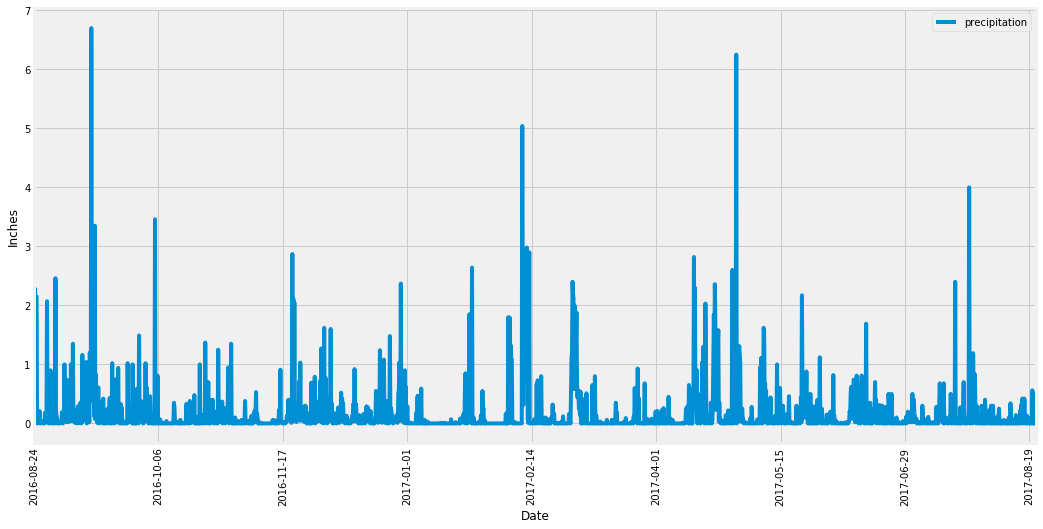

In [60]:
#Drop N/A values
precip_df = precip_df.dropna()
#sort by date
precip_df = precip_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plot = precip_df.plot(figsize = (16,8),rot =90)

plot.set_ylabel('Inches')
plot.set_xlabel('Date')
plot.figure.savefig('year_precip.png')

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
# Design a query to show how many stations are available in this dataset?
active_stations = session.query(Measurement).group_by(Measurement.station).count()
active_stations

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_list = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
active_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = active_list[0][0]
most_active

'USC00519281'

In [54]:
temp_min = session.query(func.min(Measurement.tobs)).filter_by(station = most_active).all()
temp_min

[(54.0)]

In [55]:
temp_max = session.query(func.max(Measurement.tobs)).filter_by(station = most_active).all()
temp_max

[(85.0)]

In [56]:
temp_avg = session.query(func.avg(Measurement.tobs)).filter_by(station = most_active).all()
temp_avg

[(71.66378066378067)]

In [57]:
# Choose the station with the highest number of temperature observations.
active_temp_station = session.query(Measurement.station,func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_temp_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

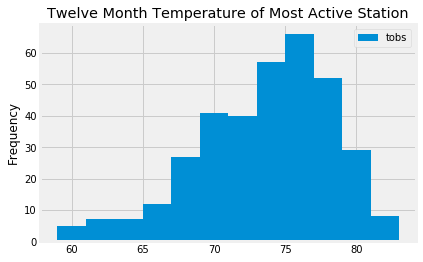

In [63]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#query for the last year of temperature data
temperature_data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > previous_year)
                   .filter(Measurement.station == most_active)
                   .order_by(Measurement.date)
                   .all())

#convert query object to data frame
temp_df = pd.DataFrame(temperature_data)
temp_df = temp_df.set_index('date')

#sory by date
temp_df = temp_df.sort_index(ascending=True)

#histogram plot with pandas
temp_df.plot(kind='hist', bins=12)
plot.set_ylabel('Temperature')
plot.set_xlabel('Frequency')
plt.title("Twelve Month Temperature of Most Active Station")
plot.figure.savefig('year_temp.png')

## Bonus Challenge Assignment

In [70]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [74]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#Trip dates 10/8 - 10/15
trip_start = '2016-10-08'
trip_end = '2016-10-15'
trip_temps = calc_temps(trip_start, trip_end)

print(f"Highest Temperature: {trip_temps[0][2]} Fahrenheit")
print(f"Lowest Temperature: {trip_temps[0][0]} Fahrenheit")
print(f"Average Temperature: {round(trip_temps[0][1], 2)} Fahrenheit")

Highest Temperature: 82.0 Fahrenheit
Lowest Temperature: 71.0 Fahrenheit
Average Temperature: 77.5 Fahrenheit


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
